In [1]:
import sympy as sp
sp.init_printing()
from sympy import vector
C = vector.CoordSys3D('', vector_names=['x', "y", "z"],
                     variable_names=['x', "y", "z"])

xhat = C.i
yhat = C.j
zhat = C.k
x = C.x
y = C.y
z = C.z

# Midterm 1
## Instructions
Use `sympy` to work the problems in this notebook, then submit via pull request. You may use any notebooks we have built over the course of the semester as reference material. Try to format your answers as readably as possible.

For vector problems, you may use any of the three methods we have discussed for working with vectors in `sympy`.

## `sympy` basics
### Problem 1

a) Solve $$ ax^2 + bx +c = 0$$ for $x$.


In [2]:
a = sp.symbols('a')
b = sp.symbols('b')
c = sp.symbols('c')

a*x**2 + b*x + c = 0

x

SyntaxError: can't assign to operator (<ipython-input-2-3f458e547580>, line 5)


b) Substitute $a=4$, $b=1$ and $c=-3$ into your answers to the previous question, and have `sympy` give you numerical results.

---

## Vector basics
### Problem 2
Given the vectors $$\mathbf{A} = \left(\begin{array}{c}1\\3\\-2\end{array}\right) \qquad \text{and} \qquad
\mathbf{B}= \left(\begin{array}{c}4\\1\\5\end{array}\right),$$
what are

a) $\mathbf{A} + \mathbf{B}$?

In [2]:
A = 1*xhat + 3*yhat - 2*zhat
B = 4*xhat + 1*yhat + 5*zhat
A + B

b) $\mathbf{A}\cdot\mathbf{B}$?

In [3]:
A.dot(B)

c) $\mathbf{A}\times\mathbf{B}$?

In [4]:
A.cross(B)

d) $\mathbf{A} \cdot \left(\mathbf{B} - \left(\mathbf{A}\cdot\mathbf{B}\right)\mathbf{A}\right)$

In [5]:
A.dot(B - (A.dot(B))*A)

---

## Derivatives

### Problem 3
Given the functions $$\phi = xy - 3z^2$$ and $$\mathbf{v} = zx\hat{\mathbf{x}} + yz\hat{\mathbf{y}} - xy\hat{\mathbf{z}},$$

what are

a) $\nabla\phi$?

In [5]:
phi = sp.symbols('phi')
phi = x*y - 3*z**2
vector.gradient(phi)

b) $\nabla \cdot \left(\phi \mathbf{v}\right) $

In [6]:
v = z*x*xhat + y*z*yhat - x*y*zhat
vector.divergence(phi*v)

c) $\nabla\times \mathbf{v}$

In [14]:
vector.curl(v)

d) $(\nabla\cdot\mathbf{v}) (\nabla\phi\times\hat{\mathbf{z}})$

In [15]:
(vector.divergence(v))*((vector.gradient(phi)).cross(zhat))

---

## Integrals

### Problem 4
a) For the $\phi$ defined above, evaluate $$\iiint \phi \,d\tau $$ over the tetrahedron with vertices at $(0,0,0)$, $(1,0,0)$, $(0,1,0)$, and $(0,0,1)$.

In [16]:
vol_integral = sp.integrate(sp.integrate(sp.integrate(phi, 
                                                      (x,0,1)), 
                                         (y, 0, 1)), 
                            (z, 0, 1))
vol_integral

b) Evaluate $$\int \mathbf{v}\cdot\,d\mathbf{l}$$ along the path $(1,1,1) \rightarrow (1,1,0) \rightarrow (0,0,0)$.

In [8]:
vert = sp.integrate(v.dot(zhat), (z, 1, 0)).subs({x:1, y:1})

horiz = (sp.integrate(sp.integrate(v.dot(xhat), (x, 1, 0))), (y, 1, 0)).subs({z:0})
#not sure how to integrate this along x AND y in this way
#This line is y = x. This is the one thing I was missing.
line_integral = horiz + vert
line_integral

ValueError: Invalid multiplication

---

## Curvilinear coordinates

### Problem 5
Verify the divergence theorem for the function 
$$\mathbf{w} = r^3 \cos\theta\sin\phi\,\hat{\mathbf{r}} + {\sin\theta\over r} \hat{\boldsymbol{\theta}}$$ 

on the volume (in spherical coordinates) 
$$\begin{eqnarray} a &\le r &\le b \\ 0 & \le \theta &\le \pi/6 \\ \pi/4 &\le \phi &\le \pi\end{eqnarray}$$ 

In [7]:
r = sp.symbols('r')
theta = sp.symbols('theta')
phi = sp.symbols('phi')
a = sp.symbols('a')
b = sp.symbols('b')
S = vector.CoordSys3D('', vector_names=['r', "\\theta", r"\phi"],
                     variable_names=['r', "\\theta", r"\phi"])

r = S.x
theta = S.y
phi = S.z

rhat = S.i
thetahat = S.j
phihat = S.k

w = r**3*sp.cos(theta)*sp.sin(phi)*rhat + (sp.sin(theta) / r)*thetahat



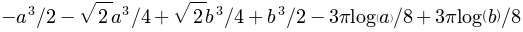

In [ ]:
div_w = vector.divergence(w)
vol_integral = sp.integrate(sp.integrate(sp.integrate(div_w, 
                                                      (r,a,b)), 
                                         (theta, 0, (sp.pi / 6))), 
                            (phi, (sp.pi/4), sp.pi))
vol_integral
#need to include r**2 sin(theta) (always do this in spherical coordinates)

In [ ]:
surface_integral = 
#We did it as front, back, top, bottom, etc. I'm not sure how that works in spherical coordinates

Notes:

In spherical coordinates:
dr = normal
dtheta = rsin(theta)
dphi = rsin(theta)
dtheta dphi = r**2*sin(theta)